[-2.75935136e+01  4.68642999e+04 -5.47548350e+01  5.91318041e+03
  8.47277328e+01]


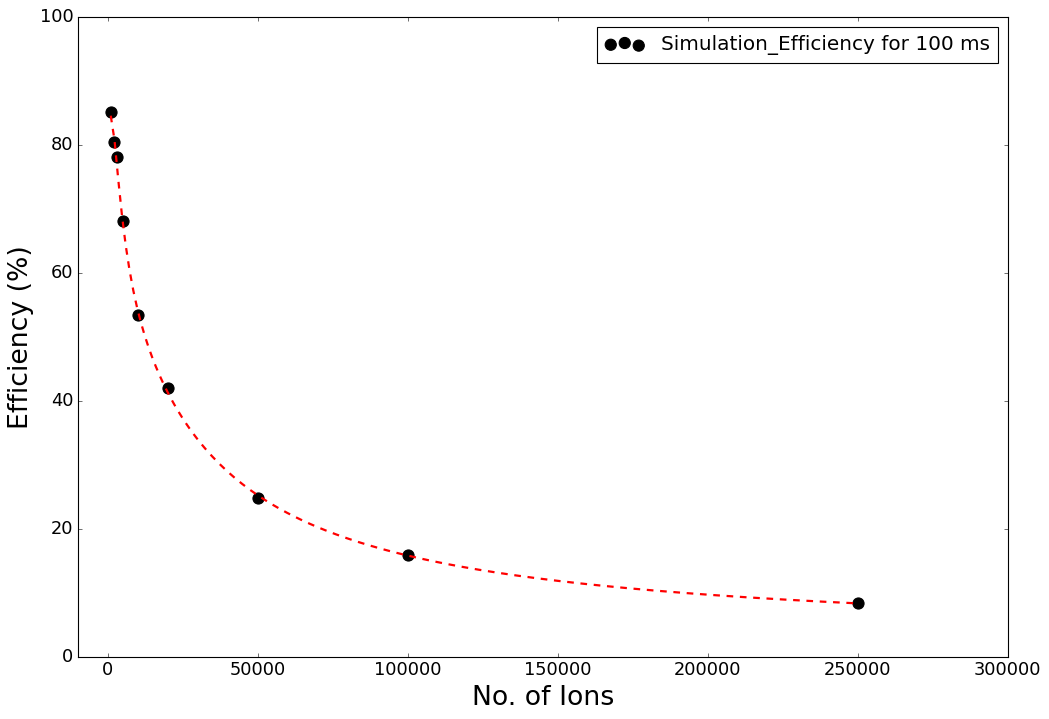

In [2]:
# Importing the libariries

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import *

plt.style.use('classic')
plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'

# Import curve fitting package from scipy
from scipy.optimize import curve_fit


# Function to calculate the exponential with constants a and b
def exponential(x, a, b, c, d, e):
    return a*np.exp(-b/x) + c*np.exp(-d/x)+e

data = pd.read_csv('Selfbunching_EF.txt',sep='\s+',header=None)
data = pd.DataFrame(data)

x2 = data[0]
xnew = np.linspace(1000,250000,200)

#x2_norm = (x2 - x2[0])/(x2[-1] - x2[0])   # nor                 malized

y2 = data[1]


plt.scatter(x2, y2, color = 'black', s = 100, label = "Simulation_Efficiency for 100 ms")

# Fit the dummy exponential data
popt, pcov = curve_fit(f=exponential, xdata=x2, ydata=y2, p0=[0, 0, 0, 0, 0], bounds=(-np.inf, np.inf))

# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
#stdevs = np.sqrt(np.diag(cov))
# Calculate the residuals
#res = y - power_law(x, *pars)

# Plot the fit data as an overlay on the scatter data
plt.plot(xnew, exponential(xnew, *popt), linestyle='--', linewidth=2, color='red')

print(popt)

#plt.text(3,100,'Fitting function ~ $a*x^b$',fontsize=20,color='black')
#plt.text(3,70,'Experiment: $a$ ~ 254.06; $b$ ~ 0.457',fontsize=20,color='black')
#plt.text(3,40,'Simulation: $a$ ~ 230.31; $b$ ~ 0.521',fontsize=20,color='black')


plt.xlabel('No. of Ions')
plt.ylabel('Efficiency (%)')
plt.xlim(-10000,300000)
plt.ylim(0,100)
plt.title('')
plt.legend(loc='best')
plt.show()

